# Lending Club Case Study
### Group_Facilitators
- Siddakka Saptasagare
- Kumarguru Muthuraj
## Business Understanding
   **You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:**
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

  **When a person applies for a loan, there are two types of decisions that could be taken by the company:**

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

> Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

> Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

> Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives
  **This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.**
- The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
# Loading required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

### Loading and Extracting the loan zip file

In [2]:
# importing the zipfil elibrary required to extract and read the zip file
import zipfile as zf
filename= 'loan.zip'
loan = zf.ZipFile(filename,'r')
# extracting the files using 'extracall' method
print(loan.printdir()) 
loan.extractall()

File Name                                             Modified             Size
loan.csv                                       2017-05-16 14:10:10     34813575
None


In [3]:
#Creating the dataframe by using the csv file present in the zip file
df = pd.read_csv(loan.open('loan.csv'),low_memory=False, parse_dates=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Checking the shape of the dataframe
print(df.shape)

(39717, 111)


In [5]:
# We observed that there are more then 100 columns present in our dataframe
#Lets use set_option to display all the columns of df
pd.set_option('display.max_columns', 200)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Data Cleaning and fixing rows/Columns

In [6]:
# Lets drop the columns of the df having all null values
thresh = len(df) * .5
df.dropna(thresh = thresh, axis = 1, inplace = True)
print(df.shape)
# Lets reset the row index from default to id
df.set_index(['id'],inplace=True)
df.head()

(39717, 54)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
# Checking the null values of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

In [8]:
# Lets drop the irrelevent columns to get proper and structured data frame for analysis
# I am dropping the columns because the values of the column or either "0" or same
df.drop(['pymnt_plan','url','desc','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True, axis=1)
print(df.shape)

(39717, 42)


In [9]:
# Lets replace special character and convert interest rate to float
df.int_rate = df['int_rate'].str.strip('%').astype('float')
df.revol_util = df['revol_util'].str.strip('%').astype('float')
df['term']= df['term'].str.split("months").str[0].astype('int')
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [10]:
# Lets do the data impuation for emp_title and emp_length columns
df.emp_title = df.emp_title.fillna(df.emp_title.mode()[0])
df.emp_length = df.emp_length.fillna(df.emp_length.mode()[0])
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [11]:
# Creating a new column to extract primary sector of investment from category_list
df['Issue_Month'], df['Issue_Year'] = df['issue_d'].str.split('-').str
df['last_credit_pull_month']= df.last_credit_pull_d.str.split('-').str[0].str.upper()
df['last_credit_pull_Year']= df.last_credit_pull_d.str.split('-').str[1]
df['last_pymnt_month']= df.last_pymnt_d.str.split('-').str[0].str.upper()
df['last_pymnt_year']= df.last_pymnt_d.str.split('-').str[1]
df['earl_cr_line_month']= df.earliest_cr_line.str.split('-').str[0].str.upper()
df['earl_cr_line_year']= df.earliest_cr_line.str.split('-').str[1]
# appending as sunstring 20 to convert the year in correct format
df['Issue_Year']='20' + df['Issue_Year'].astype(str)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011,MAY,16,JAN,15,JAN,85
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011,SEP,13,APR,13,APR,99
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011,MAY,16,JUN,14,NOV,01
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011,APR,16,JAN,15,FEB,96
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,2011,MAY,16,MAY,16,JAN,96


In [12]:
# Lets check the details of addr_state
print(df.addr_state.unique())

# lets create Region column depedning on the state column value
# https://www.ducksters.com/geography/us_states/us_geographical_regions.php
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

df['Region']= np.nan

def map_region(state):
    if state in west:
        return 'west'
    elif state in south_west:
        return 'south_west'
    elif state in south_east:
        return 'south_east'
    elif state in mid_west:
        return 'mid_west'
    elif state in north_east:
        return 'north_east'
df['Region'] = df['addr_state'].apply(map_region)
df.head()

['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year,Region
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011,MAY,16,JAN,15,JAN,85,south_west
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011,SEP,13,APR,13,APR,99,south_east
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011,MAY,16,JUN,14,NOV,01,mid_west
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011,APR,16,JAN,15,FEB,96,west
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,2011,MAY,16,MAY,16,JAN,96,west


In [13]:
# lets standardize the empl_length column
def emp_length(val):
    return (val.replace("years","").replace("+","").replace("<","").replace("year",""))
df.emp_length=df.emp_length.apply(emp_length)
df.emp_length=df.emp_length.astype(int)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year,Region
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011,MAY,16,JAN,15,JAN,85,south_west
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011,SEP,13,APR,13,APR,99,south_east
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,US Army,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011,MAY,16,JUN,14,NOV,01,mid_west
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011,APR,16,JAN,15,FEB,96,west
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,2011,MAY,16,MAY,16,JAN,96,west


### Lets do the Loan similarity distribution
- What amount of loan has been issued
- What is frequency distribution loan over a period

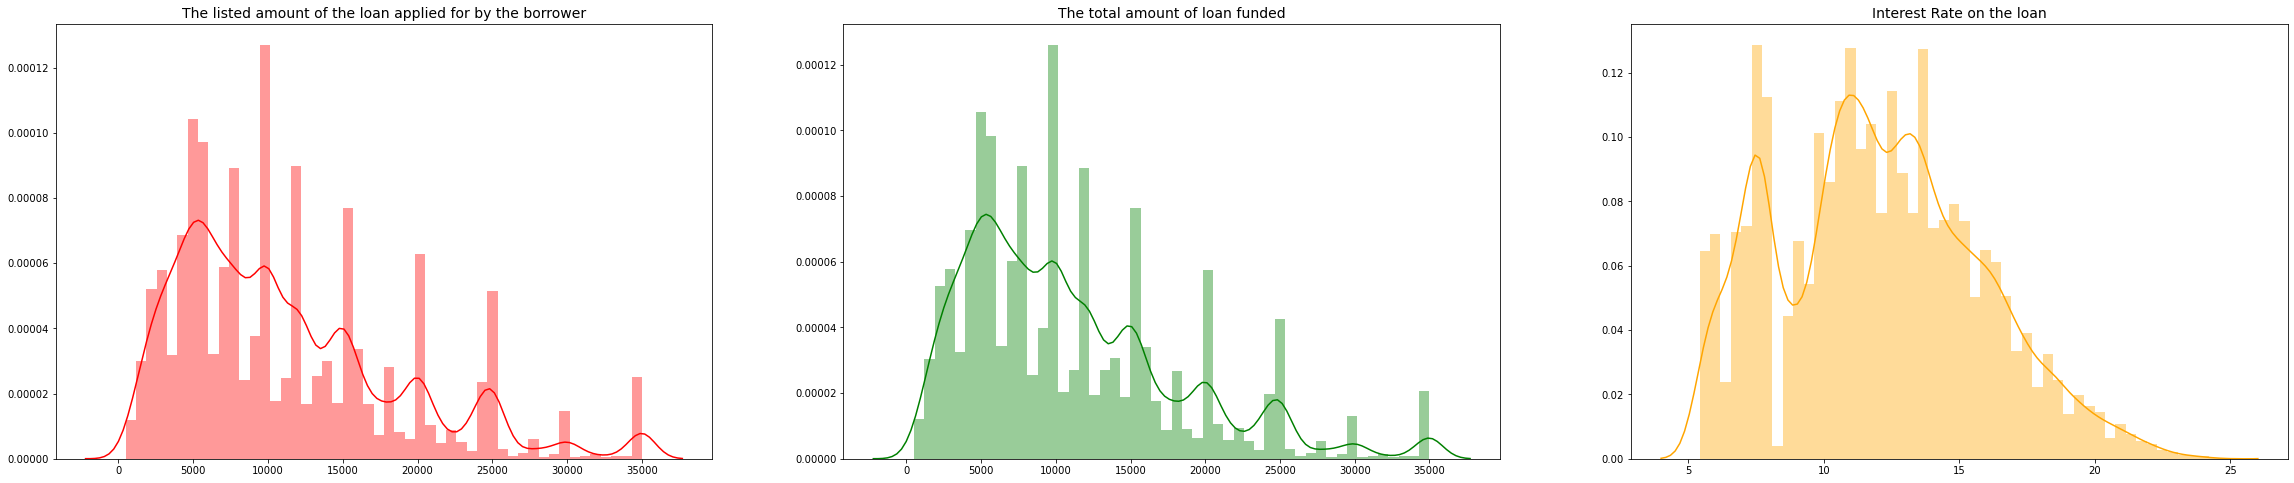

In [14]:
# Lets create the subsets to plot the distribution of loan amount
Loan_Amount = df.loan_amnt.values
Funded_Amount= df.funded_amnt.values
Interest_Rate =df.int_rate.values

fig, ax = plt.subplots(1, 3, figsize=(40,8))

# Lets draw the distribution plot for the above subsets
sns.distplot(Loan_Amount, ax=ax[0], color='red')
sns.distplot(Funded_Amount, ax=ax[1], color='green')
sns.distplot(Interest_Rate, ax=ax[2], color='orange')

# Lets set the title for each plots
ax[0].set_title("The listed amount of the loan applied for by the borrower", fontsize=14)
ax[1].set_title("The total amount of loan funded", fontsize=14)
ax[2].set_title("Interest Rate on the loan", fontsize=14)
plt.show()

- **Observation**: From the above distribution plots we can conclude that the loan amount issued, loan amount funded and the interest rate are normally distributed

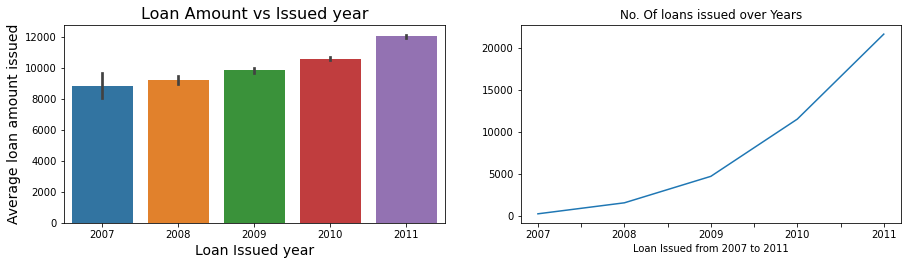

In [15]:
# Lets draw a plot a bar graph to see the loan amount vs Year of Loan Issued
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot('Issue_Year', 'loan_amnt', data=df)
plt.title('Loan Amount vs Issued year', fontsize=16)
plt.xlabel('Loan Issued year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

plt.subplot(2,2,2)
g = df.groupby('Issue_Year')['loan_status'].count()
g.plot.line(x_compat=True)
#plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No. Of loans issued over Years')
plt.xlabel('Loan Issued from 2007 to 2011')

plt.show()

- **Observation**: From the above graph we can coonclude that loans issued over the years are increasing exponentially.

## Good Loan vs Bad Loans
  **Lets see the no. of Bad loans in Dataframe to find out the risk of load falling into default category.**

In [16]:
# Lets check the status of the loans given by Lending club
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

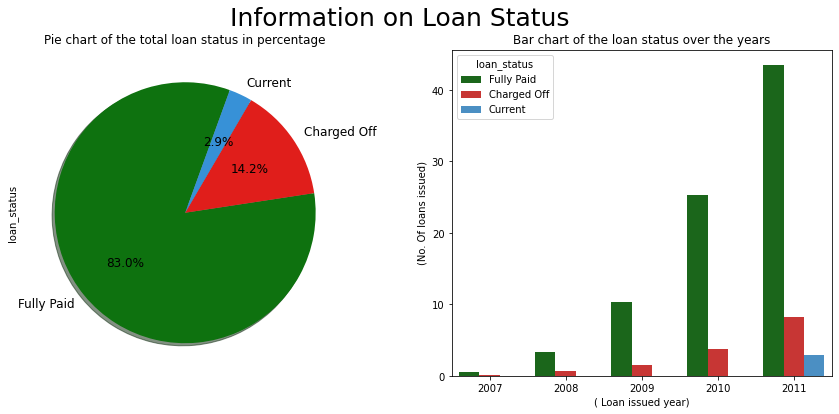

In [17]:
# Plotting the Loan status chart check the % of the Loan Status
f, ax = plt.subplots(1,2, figsize=(15,6))
# Plotting Pie chart
plt.suptitle('Information on Loan Status', fontsize=25)
palette = ["#0E720F","#E01E1B", "#3791D7"]
df["loan_status"].value_counts().plot.pie(ax=ax[0],colors = palette, shadow=True,  fontsize=12, startangle=70, autopct='%1.1f%%')
ax[0].set(title= "Pie chart of the total loan status in percentage")
#Plotting Bar Chart
sns.barplot(x="Issue_Year", y="loan_amnt", hue="loan_status", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(No. Of loans issued)")
ax[1].set(xlabel="( Loan issued year)")
ax[1].set(title="Bar chart of the loan status over the years")
plt.show()

**Observation**: 
1. From the above graph its clear that the loans that are charged off are the bad loans. Aound 14.2 % of loans are bad loans
2. Year 2011 has maximum loans that are being charged off

## Lets do the Analysis of Bad loan vs different variables

In [18]:
#lets do the filtering of the df for the latest year to do the further analysis
df = df.loc[(df['Issue_Year']== "2011"),:]
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year,Region
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011,MAY,16,JAN,15,JAN,85,south_west
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011,SEP,13,APR,13,APR,99,south_east
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,US Army,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011,MAY,16,JUN,14,NOV,01,mid_west
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011,APR,16,JAN,15,FEB,96,west
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,2011,MAY,16,MAY,16,JAN,96,west


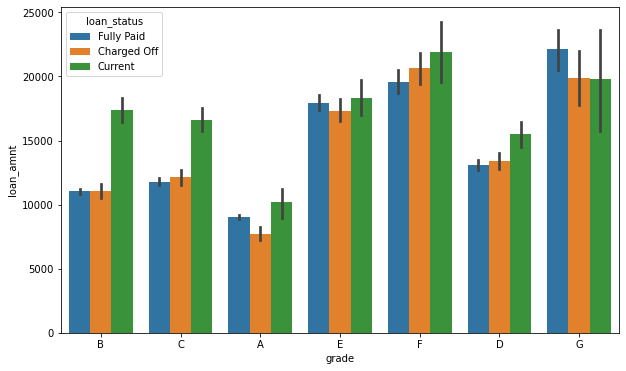

In [19]:
# Lets plot a graph of Credit grade to which grade has issued most loans
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='loan_amnt', hue='loan_status',data=df)
plt.show()

**Observation**: 
 1. From the above graph we can conclude that grade E, F and G have received the maximul loan amount
 2. Top 3 grades that have the chances of becoming default are E, F and G

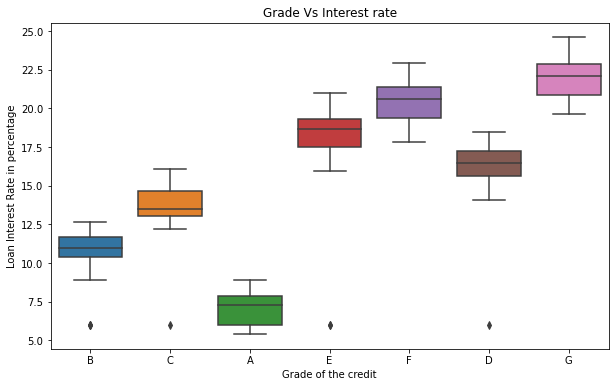

In [20]:
# Lets see the relation of Credit grade and the interest rate
plt.figure(figsize=(10,6))
sns.boxplot(y='int_rate', x='grade', data=df)
plt.ylabel('Loan Interest Rate in percentage')
plt.xlabel('Grade of the credit')
plt.title('Grade Vs Interest rate')
plt.show()

**Observation**: 
- From the above graph we can conclude that grade E, F and G have received loan with highest interest rate

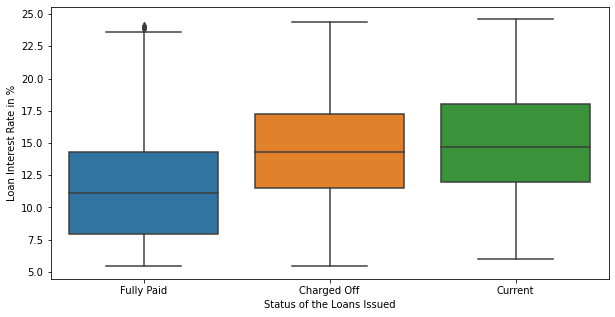

In [21]:
# Lets see the relation of Interest rate and the interest rate
plt.figure(figsize=(10,5))
sns.boxplot(y='int_rate', x='loan_status', data=df)
plt.ylabel('Loan Interest Rate in %')
plt.xlabel('Status of the Loans Issued')
plt.show()

**Observation**: 
- From the above graph we can conclude that loans issued with interest rate >15% are being charged off

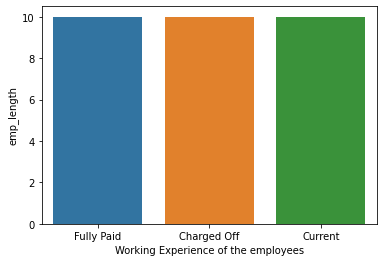

In [22]:
# lets plot a graph to check the impact of employee experience on loan issued
plt.figure(figsize=(6,4))
sns.barplot(y='emp_length', x='loan_status',data=df, estimator=np.max)
plt.xlabel('Working Experience of the employees')
plt.show()

**Observation**: 
- From the above graph we can conclude loan status is not dependent on the employeement length

### Lets see the distribution of the annual income of the employees

In [23]:
# Lets create a column to see if the loan issued is benificial for lending club or not
df['Loan_Result']=(df['total_pymnt']-df['funded_amnt'])*100/df['funded_amnt']
# Loan to income Ratio
df['Loan_to_inc_ration'] = df.funded_amnt*100/df.annual_inc
# Annula income in thousand Dollers
df['annual_inc'] = df['annual_inc'] / 1000
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year,Region,Loan_Result,Loan_to_inc_ration
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,10,RENT,24.000,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011,MAY,16,JAN,15,JAN,85,south_west,17.263104,20.833333
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30.000,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011,SEP,13,APR,13,APR,99,south_east,-59.651600,8.333333
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,US Army,10,RENT,12.252,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011,MAY,16,JUN,14,NOV,01,mid_west,25.236119,19.588639
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49.200,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011,APR,16,JAN,15,FEB,96,west,22.318900,20.325203
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80.000,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,2011,MAY,16,MAY,16,JAN,96,west,17.111000,3.750000


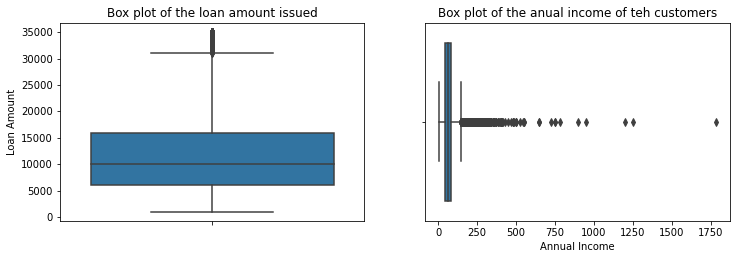

In [24]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.title('Box plot of the loan amount issued')

plt.subplot(2,2,2)
sns.boxplot( x=df["annual_inc"] )
plt.xlabel('Annual Income')
plt.title('Box plot of the anual income of teh customers')
plt.show()

**Observation**: From the above graphs we can conclude the below points
- The amount of loan issued lies between 5000 to 15000 USD
- The annual income of the most applicants is <1000 k USD

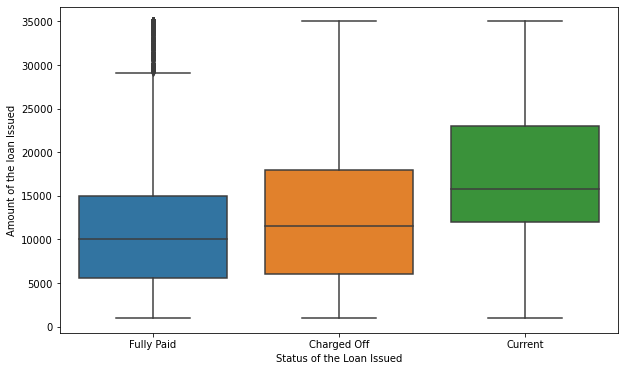

In [25]:
# Lets see if there is any relation between the loan amount funded and the loan status
plt.figure(figsize=(10,6))
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Amount of the loan Issued')
plt.xlabel('Status of the Loan Issued')
plt.show()

**Observation**: 
- From the above graph we can conclude that on no. of charged off loans are more for average loan amount issued >10000
- Hence loan amount >10000 are having chances of becoming bad laons

### Lets check the relation between the Loan purpose and the Loan status

In [26]:
# Lets check the details of loan purpose
df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy'],
      dtype=object)

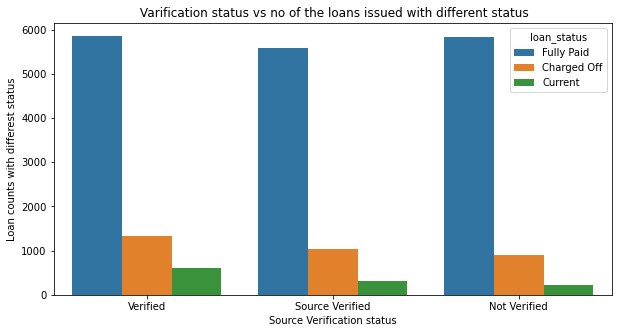

In [27]:
# Lets draw a graph to show the loan status vs purpose
plt.figure(figsize=(10,5))
sns.countplot(x='verification_status', hue="loan_status", data=df)
plt.ylabel('Loan counts with differest status')
plt.xlabel('Source Verification status')
plt.title(' Varification status vs no of the loans issued with different status')
plt.show()

**Observation**: 
- From the above graph we can conclude that loan status is not dependent on the verification status

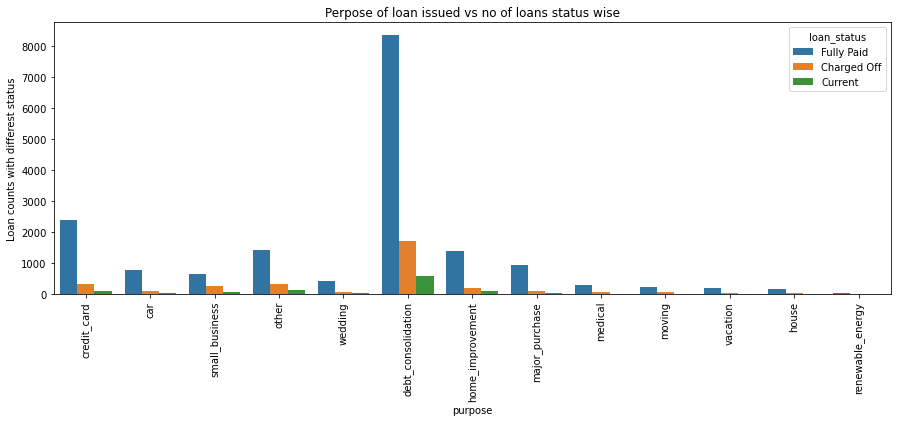

In [28]:
# Lets draw a graph to show the loan status vs purpose
plt.figure(figsize=(15,5))
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.ylabel('Loan counts with differest status')
plt.title("Perpose of loan issued vs no of loans status wise")
plt.xticks(rotation=90)
plt.show()

**Observation**: From the above graph we can conclude below points:
1. Top 5 perposes of borrowing the loans are Debt_consolidation, Credeit_card, small business, other and Home_improvement
2. Loan issued for the perpose Debt_consolidation, Credeit_card, small business, other and Home_improvement are having more chances of becoming bad loans

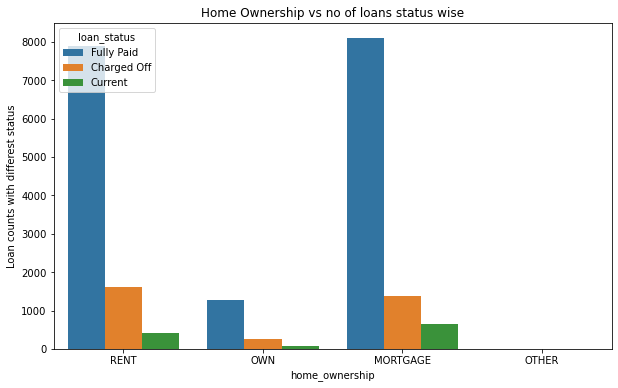

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.ylabel('Loan counts with differest status')
plt.title("Home Ownership vs no of loans status wise")
plt.show()

**Observation**: From the above graph we can conclude below points:
1. Maximum laons are issued for customers having ownership as Rent and Mortgage
2. Rent and mortgage homeownership loan members are having possibility of defaulting the loan

### Lets check the relation between loan status, loan amount and the bankcrupticies

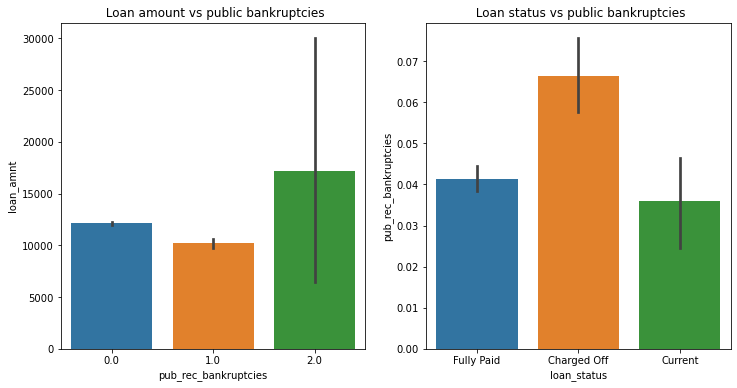

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(y='loan_amnt', x='pub_rec_bankruptcies', data=df)
plt.title(' Loan amount vs public bankruptcies')
plt.subplot(1,2,2)
sns.barplot(x='loan_status', y='pub_rec_bankruptcies', data=df)
plt.title(' Loan status vs public bankruptcies')
plt.show()

## Lets do multivariant analysis

#### Lets see the frequency of loan in different regions of the country

In [31]:
# Lets create a loan_group df to see the insights
Loan_group = df.groupby(['Issue_Month','Region'], as_index=False).sum()
Loan_group.loan_amnt = Loan_group.loan_amnt/1000
Loan_group.head()

,Issue_Month,Region,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,Loan_Result,Loan_to_inc_ration
0,Apr,mid_west,225396683,2588.225,2585225,2.572786e+06,11472,2913.95,70190.42,1418,14897.21532,3584.85,35,263,2330,18,2773544,11326.82,5592,0.00,0.00,2.824374e+06,2810373.60,2176378.81,608127.49,270.691907,39597.15,5368.6197,681153.95,16.0,1983.629636,4725.314335
1,Apr,north_east,358445780,4477.150,4477150,4.411015e+06,17616,4580.59,126762.64,2055,26693.64767,5280.91,74,307,3612,24,4873054,18513.26,8420,42.66,42.63,5.172458e+06,5094896.35,4162049.47,974598.72,580.508599,35229.42,5841.0813,1125265.96,16.0,5561.924237,7309.140511
2,Apr,south_east,328407967,4116.975,4107575,4.042826e+06,16428,4126.26,111923.04,1962,23814.31408,5034.17,65,272,3325,20,4949903,15766.70,8267,0.00,0.00,4.554847e+06,4509198.80,3620398.09,903333.47,271.580791,30843.92,3244.8655,1012282.27,17.0,3385.291418,6784.270641
3,Apr,south_west,147080423,1769.750,1769750,1.738165e+06,7320,1872.05,48317.61,819,11045.10800,2222.82,17,124,1469,10,1741195,7997.90,3913,0.00,0.00,2.037388e+06,1997637.37,1626797.17,405533.00,192.304816,4865.69,222.7633,575282.11,10.0,1790.342285,2767.772444
4,Apr,west,376119207,4569.975,4560300,4.534676e+06,18156,4809.95,129967.50,2209,26684.88844,5427.53,70,285,3550,16,5303138,19854.52,8407,0.00,0.00,4.937160e+06,4900750.93,3978335.50,923055.44,285.559849,35483.50,2195.1842,1255917.69,16.0,3499.831891,7689.639287


In [32]:
# lets plot the graph to see correlation
df_dates = pd.DataFrame(data=Loan_group[['Issue_Month','Region','loan_amnt']])
by_issued_amount = df_dates.groupby(['Issue_Month', 'Region']).loan_amnt.sum()
by_issued_amount.head()

Issue_Month  Region    
Apr          mid_west      2588.225
             north_east    4477.150
             south_east    4116.975
             south_west    1769.750
             west          4569.975
Name: loan_amnt, dtype: float64

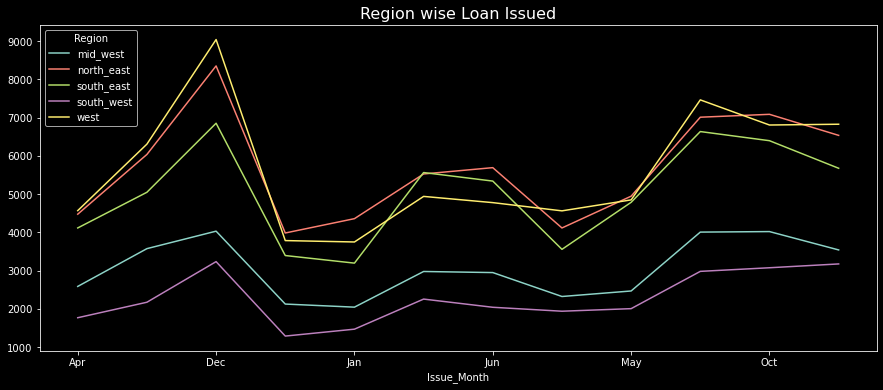

In [33]:
# lets plot the graph to see correlation
plt.style.use("dark_background")
cmap = plt.cm.Set3
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True,figsize=(15,6))
plt.title('Region wise Loan Issued', fontsize=16)
plt.show()

#### Lets verify the dependency of employement length, anual income, interest rate, debt to income ration region wise

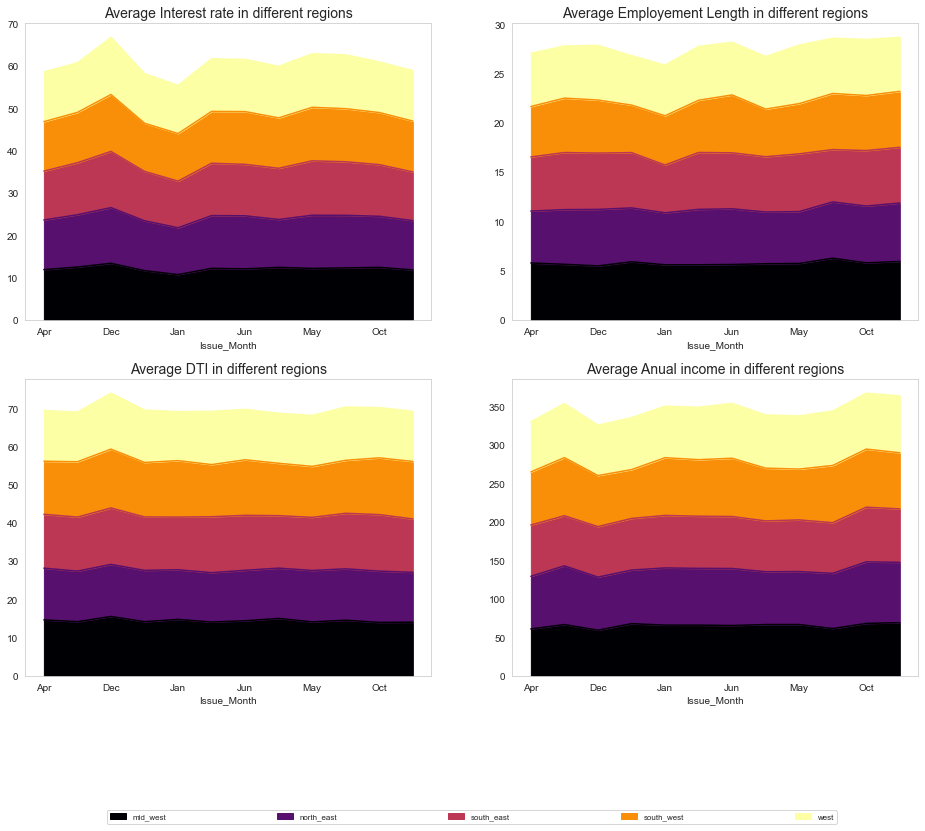

In [34]:
# lets draw the plot
sns.set_style('whitegrid')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno
by_int_rate = df.groupby(['Issue_Month', 'Region']).int_rate.mean()
by_int_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest rate in different regions', fontsize=14)
by_emp_length = df.groupby(['Issue_Month', 'Region']).emp_length.mean()
by_emp_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employement Length in different regions', fontsize=14)
by_dti = df.groupby(['Issue_Month', 'Region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average DTI in different regions', fontsize=14)
by_income = df.groupby(['Issue_Month', 'Region']).annual_inc.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Anual income in different regions', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=8,prop={'size':8},ncol=10, mode="expand", borderaxespad=0.)
plt.show()

**Observation**: From the above graph we can conclude below points:
- SouthEast , West and NorthEast regions had the highest amount of loans issued.
- West and SouthWest had a rapid increase in debt-to-income starting in Nov and Dec
- West and SouthWest had a rapid decrease in interest rates (This might explain the increase in debt to income).

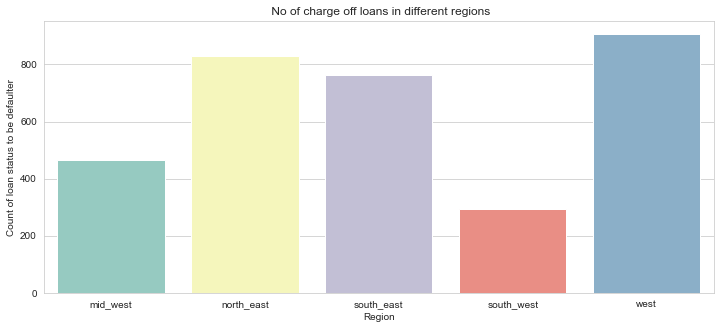

In [35]:
#Lets check the region wise loan status
plt.figure(figsize=(12,5))
g = df[df['loan_status']=='Charged Off'].groupby('Region')['loan_status'].count().reset_index()
sns.barplot(x='Region', y='loan_status', data=g)
plt.ylabel('Count of loan status to be defaulter')
plt.xlabel('Region')
plt.title(' No of charge off loans in different regions')
plt.show()

**Observation**: From the above graph we can conclude below points:
- Loans issued in West, north_east and south_east regions have more possibility of falling into default category

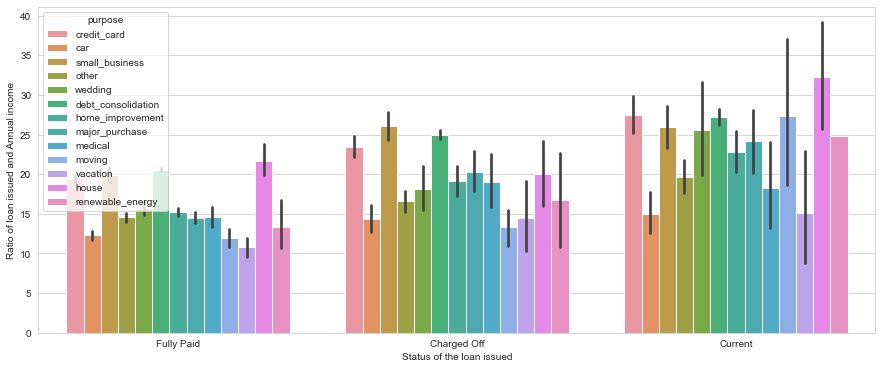

In [36]:
# Lets check the relation between loan to income ratio vs Laon status for different perpose
plt.figure(figsize=(15,6))
sns.barplot(x='loan_status',y='Loan_to_inc_ration',hue='purpose',data=df)
plt.xlabel('Status of the loan issued')
plt.ylabel('Ratio of loan issued and Annual income')
plt.show()

**Observation**: From the above graph we can conclude below points:
- loan to income ration is more for the debt_consolidation, small business and credit card

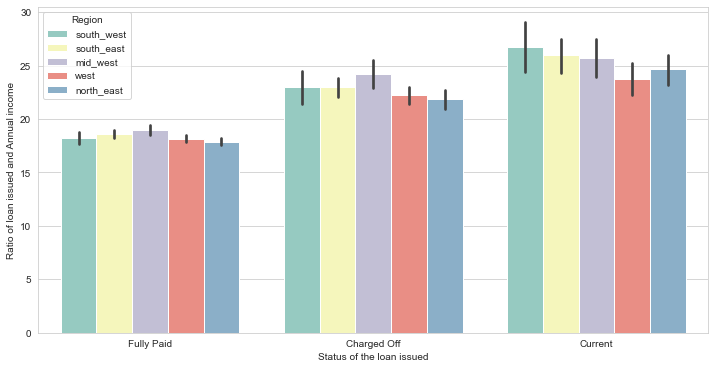

In [37]:
# Lets check the relation between loan to income ratio vs Laon status for different Region
plt.figure(figsize=(12,6))
sns.barplot(x='loan_status',y='Loan_to_inc_ration',hue='Region',data=df)
plt.xlabel('Status of the loan issued')
plt.ylabel('Ratio of loan issued and Annual income')
plt.show()

**Observation**: From the above graph we can conclude below points:
- loan to income ration is more for the loan issued in mid_west

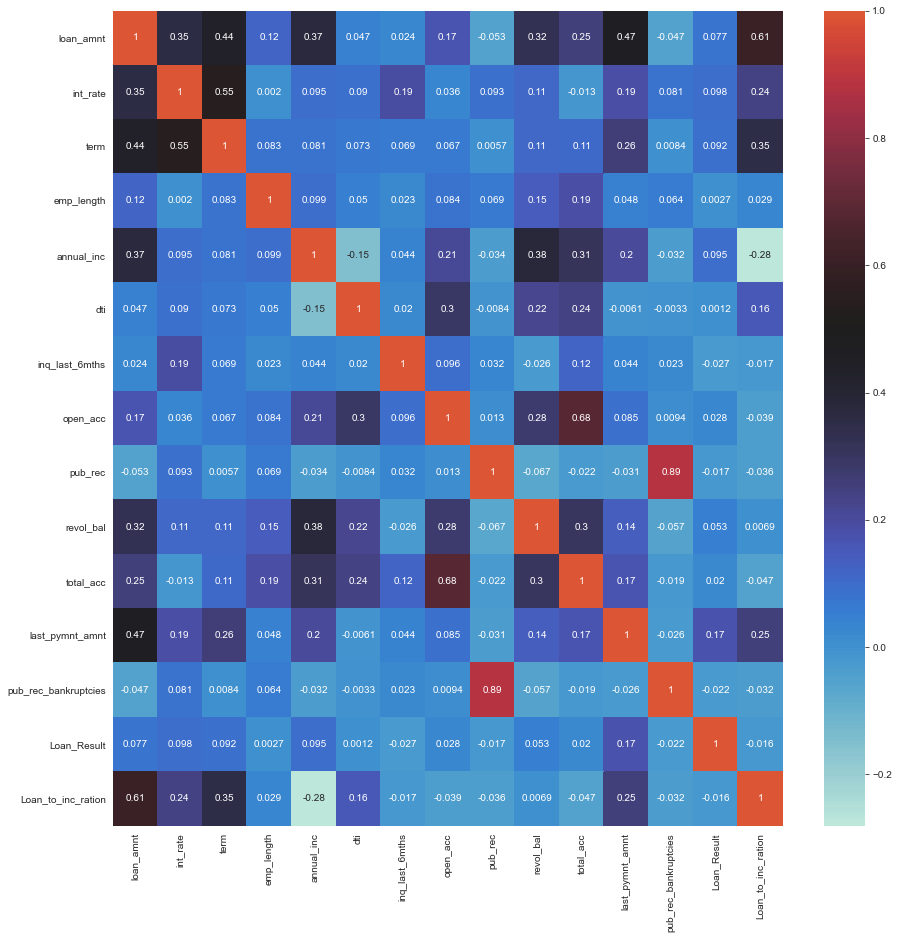

In [38]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'term','emp_length', 'annual_inc','dti', 'grade', 'Region','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','pub_rec_bankruptcies','Loan_Result','Loan_to_inc_ration']
corr = df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()

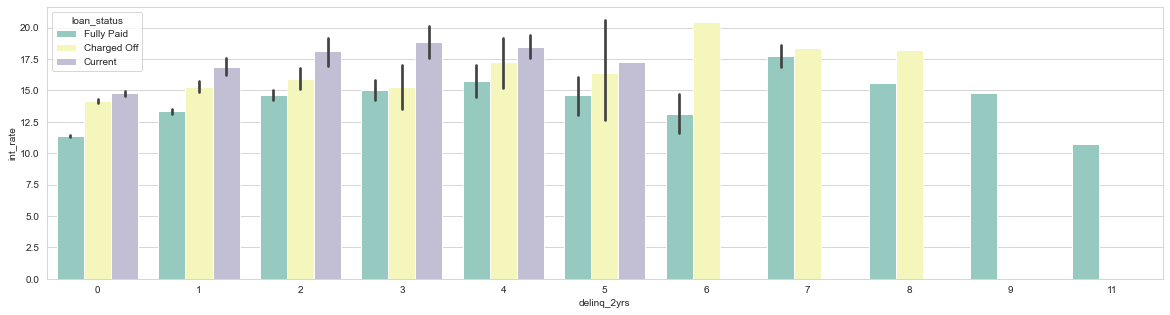

In [39]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=df, estimator=np.mean)
plt.show()

**Observation**: From the above graph we can conclude below points:
- delinq_2yrs of value 6 has more no. of loans with status as charged off
- delinq_2yrs value between 6 to 8 are having more chances of becoming bad loans

### Lets do the analysis of Laon across different income groups

In [40]:
df.annual_inc.describe()

count    21656.000000
mean        69.438245
std         47.609073
min          6.000000
25%         42.000000
50%         60.000000
75%         84.000000
max       1782.000000
Name: annual_inc, dtype: float64

In [41]:
df['income_category'] = np.nan
lst = [df]
for col in lst:
    col.loc[col['annual_inc'] <= 50, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 50) & (col['annual_inc'] <= 75), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 75, 'income_category'] = 'High'
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year,Region,Loan_Result,Loan_to_inc_ration,income_category
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,US Army,10,RENT,24.000,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011,MAY,16,JAN,15,JAN,85,south_west,17.263104,20.833333,Low
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30.000,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011,SEP,13,APR,13,APR,99,south_east,-59.651600,8.333333,Low
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,US Army,10,RENT,12.252,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011,MAY,16,JUN,14,NOV,01,mid_west,25.236119,19.588639,Low
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49.200,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011,APR,16,JAN,15,FEB,96,west,22.318900,20.325203,Low
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80.000,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,2011,MAY,16,MAY,16,JAN,96,west,17.111000,3.750000,High


In [42]:
# lets drop the loans of status current
df = df[df['loan_status']!='Current']
lst = [df]
df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[df['loan_status'] == 'Fully Paid', 'loan_status_int'] = 0 # Negative (Bad Loan)
    col.loc[df['loan_status'] == 'Charged Off', 'loan_status_int'] = 1 # Positive (Good Loan)
    
    
# Convert from float to int the column (This is our label)  
df['loan_status_int'] = df['loan_status_int'].astype(int)


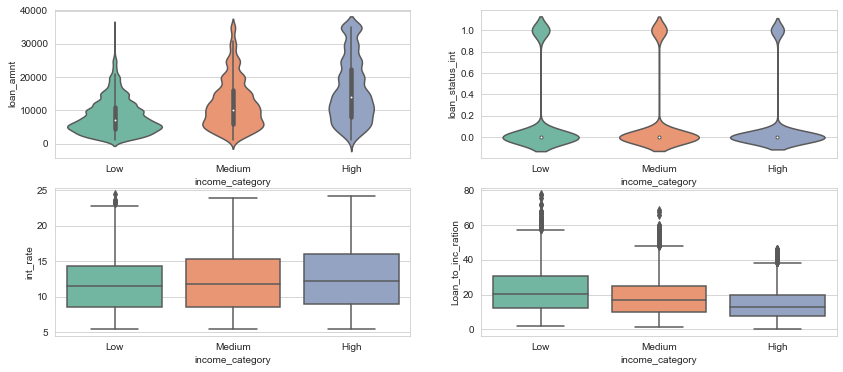

In [43]:
# Plot of income category vs different variables
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

sns.violinplot(x="income_category", y="loan_amnt", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_status_int", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="int_rate", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="Loan_to_inc_ration", data=df, palette="Set2", ax=ax4)
plt.show()

**Observation**: From the above graph we can conclude below points:
1. loans of the high income category took higher loan amounts than people from low and medium income categories. Of course, people with higher annual incomes are more likely to pay loans with a higher amount.
2. Loans of the Low income category had a slightly higher chances of becoming a bad loan. 
3. loans of high income had on average higher interest rates
4. Loan of low income had average higher loan to income ration


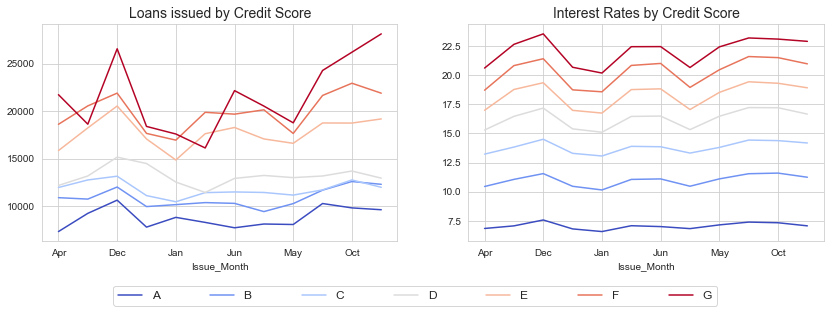

In [44]:
# Let's Plot how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['Issue_Month', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['Issue_Month', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12}, ncol=7, mode="expand", borderaxespad=0.)
plt.show()
